## Exploring Zoning Data for Carson

In [166]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [167]:
carsonzoning = gpd.read_file('data/zones (1).json')

In [168]:
open = gpd.read_file('data/closedmhps_geocoded.geojson')

In [169]:
carsonzoning.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZONE_       984 non-null    object  
 1   ZONECOMBO   984 non-null    object  
 2   EDIT_DATE   984 non-null    object  
 3   RuleIDfc    984 non-null    int64   
 4   RuleID      984 non-null    int64   
 5   Shape_Leng  984 non-null    float64 
 6   Shape_Area  984 non-null    float64 
 7   geometry    984 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 61.6+ KB


<AxesSubplot:>

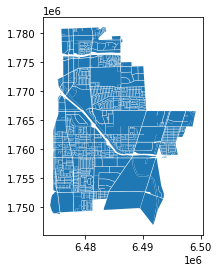

In [170]:
carsonzoning.plot()

In [171]:
carsonzoning.head()

,ZONE_,ZONECOMBO,EDIT_DATE,RuleIDfc,RuleID,Shape_Leng,Shape_Area,geometry
0,RM-8-D,RL,2010-03-30T00:00:00+00:00,13,13,303.672140,5285.052189,"POLYGON ((6479410.500 1752405.875, 6479410.500..."
1,RM-8-D,RL,2010-03-30T00:00:00+00:00,13,13,586.439415,21432.698735,"POLYGON ((6477776.000 1754549.625, 6477725.500..."
2,RM-8-D,RL,2010-03-30T00:00:00+00:00,13,13,1153.262894,35716.894000,"POLYGON ((6478420.000 1759195.750, 6478456.000..."
3,RM-8-D,RL,2010-03-30T00:00:00+00:00,13,13,309.004507,3247.309318,"POLYGON ((6480298.500 1759506.625, 6480399.000..."
4,RM-8-D,RL,2010-03-30T00:00:00+00:00,13,13,428.385665,9097.062199,"POLYGON ((6479195.175 1759508.995, 6479197.500..."


In [172]:
# trim the data to the bare minimum
carsonzoning = carsonzoning[['ZONE_', 'ZONECOMBO', 'Shape_Leng', 'Shape_Area', 'geometry']]

In [173]:
carsonzoning.head()

,ZONE_,ZONECOMBO,Shape_Leng,Shape_Area,geometry
0,RM-8-D,RL,303.672140,5285.052189,"POLYGON ((6479410.500 1752405.875, 6479410.500..."
1,RM-8-D,RL,586.439415,21432.698735,"POLYGON ((6477776.000 1754549.625, 6477725.500..."
2,RM-8-D,RL,1153.262894,35716.894000,"POLYGON ((6478420.000 1759195.750, 6478456.000..."
3,RM-8-D,RL,309.004507,3247.309318,"POLYGON ((6480298.500 1759506.625, 6480399.000..."
4,RM-8-D,RL,428.385665,9097.062199,"POLYGON ((6479195.175 1759508.995, 6479197.500..."


In [174]:
# reproject to web mercator
carsonzoning_web_mercator = carsonzoning.to_crs(epsg=3857)

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


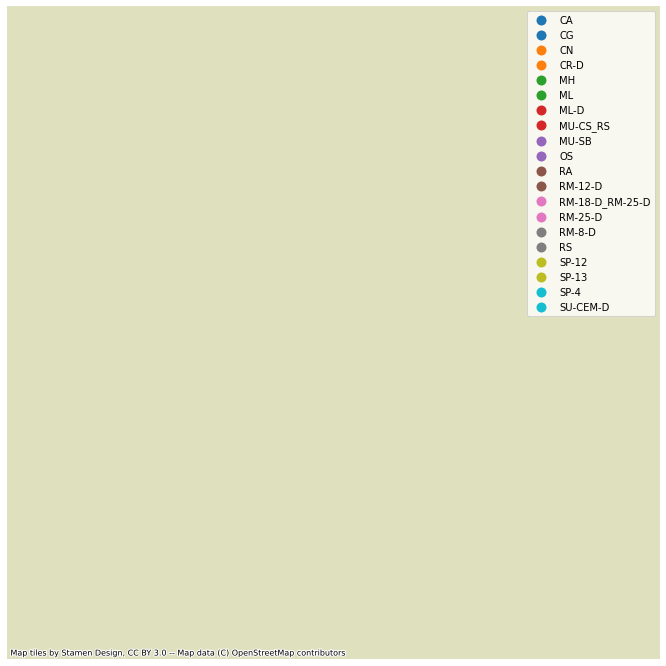

In [175]:
fig, ax = plt.subplots(figsize=(12,12))

carsonzoning_web_mercator.plot(ax=ax,
                      figsize=(20,40),
                      column='ZONE_',
                      legend=True)

ax.axis('off')

ctx.add_basemap(ax)

In [176]:
carsonzoning.ZONE_.value_counts().head(10).index.tolist()

['RS',
 'ML-D',
 'CG',
 'RM-25-D',
 'OS',
 'MH',
 'SP-4',
 'RM-12-D',
 'CR-D',
 'MU-CS_RS']

In [177]:
top10_carsonzoning = carsonzoning.ZONE_.value_counts().head(10).index.tolist()
top10_carsonzoning

['RS',
 'ML-D',
 'CG',
 'RM-25-D',
 'OS',
 'MH',
 'SP-4',
 'RM-12-D',
 'CR-D',
 'MU-CS_RS']

In [178]:
carsonzoning.ZONE_.value_counts()

RS                 469
ML-D                78
CG                  70
RM-25-D             68
OS                  64
MH                  60
SP-4                48
RM-12-D             34
CR-D                17
MU-CS_RS            17
RM-8-D              16
CN                  14
RM-18-D_RM-25-D     10
RA                   6
CA                   5
SU-CEM-D             3
MU-SB                2
SP-13                1
SP-12                1
ML                   1
Name: ZONE_, dtype: int64

In [179]:
zone_count = carsonzoning['ZONE_'].value_counts()

<AxesSubplot:title={'center':'Most Common Land Use Zones'}>

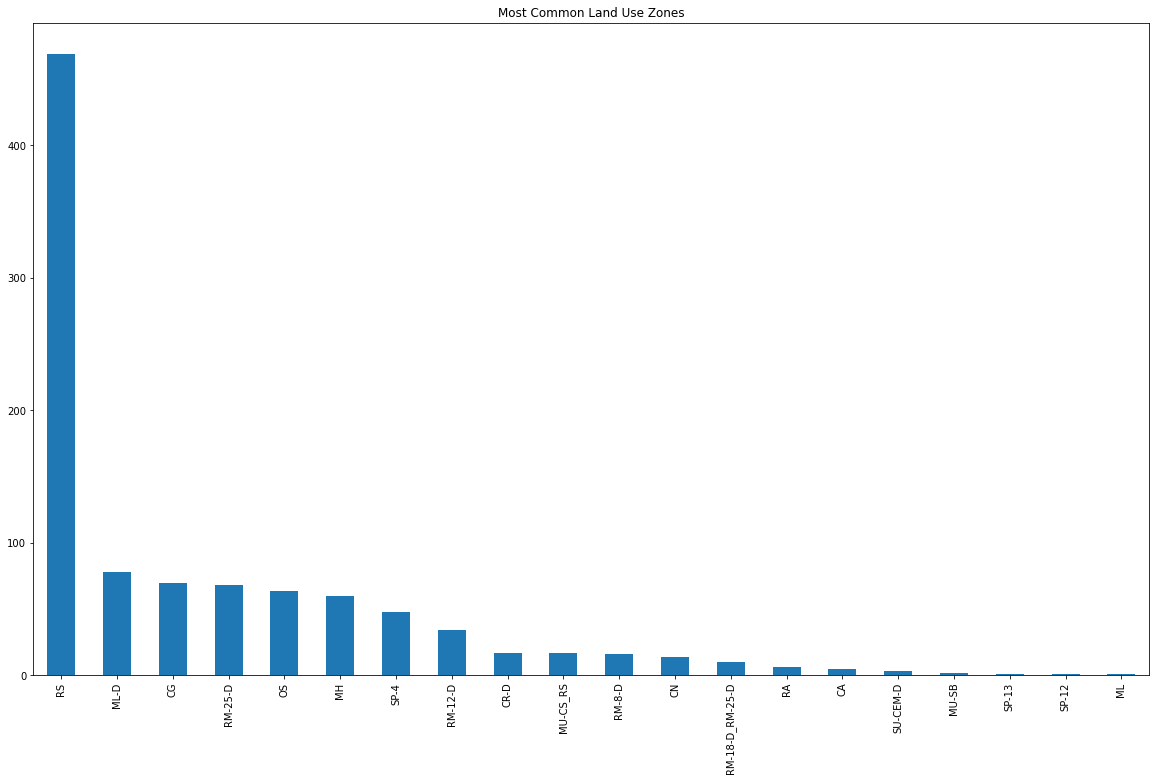

In [180]:
zone_count.plot.bar(
    figsize=(20,12), x = 'buildnng type', y = 'count', title = 'Most Common Land Use Zones')

Although my maps didn't populate the way I wanted them to, I my bar graph shows me that the most common type of zoning code in Carson is RS (single family residential).

In [181]:
# reproject to web mercator
carsonzoning_web_mercator = carsonzoning.to_crs(epsg=3857)

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


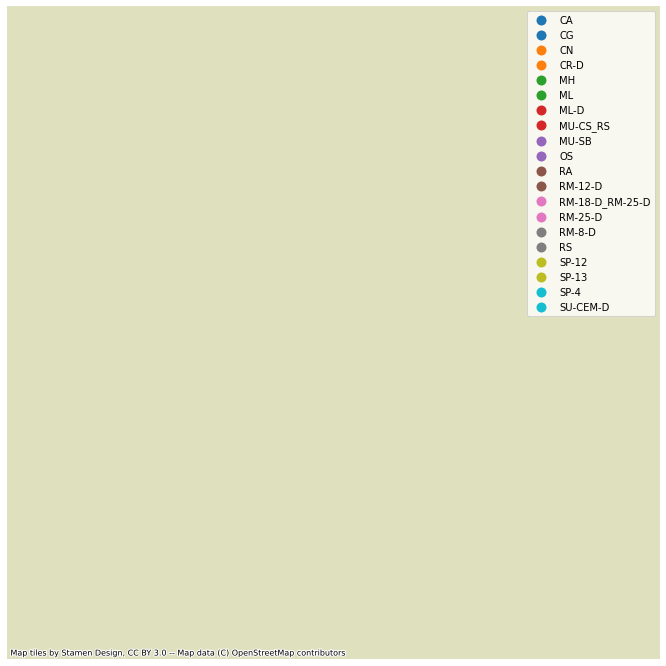

In [182]:
fig, ax = plt.subplots(figsize=(12,12))

carsonzoning_web_mercator.plot(ax=ax,
                      figsize=(20,20),
                      column='ZONE_',
                      legend=True)

ax.axis('off')

ctx.add_basemap(ax)

In [183]:
carson = open.city.value_counts().head(1).index.tolist()
carson

[' CARSON']

In [184]:
open[open.city == ' CARSON'].head()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon,geometry
15,MACKS TRAILER LODGE,LOS ANGELES,19-0390-MP,"17524 S FIGUEROA ST, CARSON , 90745",CARSON,90745,(213) 323-2312,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",47.0,0.0,0.0,"BUCKLES, ROBERT, 1483 ALLENFORD AVE, LOS ANGEL...",33.845406,-118.284245,POINT (-13167341.878 4008062.697)
22,SHADY NOOK TP,LOS ANGELES,19-0635-MP,"21009 PROSPECT AVE, CARSON , 90810",CARSON,90810,(818) 442-0383,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",6.0,0.0,0.0,"CARLSEN, KENT, PO BOX 8321, LONG BEACH, CA 90808",33.839029,-118.218364,POINT (-13160008.111 4007207.968)
42,BEL ABBEY MHP,LOS ANGELES,19-1234-MP,"200 E GARDENA BLVD, CARSON , 90745",CARSON,90745,(310) 323-3073,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",50.0,0.0,0.0,"HAPPY TRAILS, 334 GARDENA BLV., GARDENA, CA 90248",33.882030,-118.273250,POINT (-13166117.964 4012972.516)
43,DOMINGUEZ TP,LOS ANGELES,19-1311-MP,"2666 DOMINGUEZ ST, CARSON , 90810",CARSON,90810,(310) 679-2077,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",31.0,0.0,0.0,"CITY OF CARSON, CA, 1 CIVIC PLAZA, #500, LONG ...",33.839110,-118.219237,POINT (-13160105.265 4007218.835)
46,LITTLE DUDE TP,LOS ANGELES,19-1327-MP,"630 E 220TH ST, CARSON , 90745",CARSON,90745,(909) 595-8635,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",12.0,0.0,0.0,"SHIMIZU, SIG, 630 E 220TH ST., CARSON, CA 90746",33.827767,-118.264843,POINT (-13165182.139 4005698.699)


In [185]:
carson = open[open['city']== ' CARSON']

In [186]:
carson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6 entries, 15 to 57
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Park Name           6 non-null      object  
 1   County              6 non-null      object  
 2   Park Identifier     6 non-null      object  
 3   Park Address        6 non-null      object  
 4   city                6 non-null      object  
 5   zipcode             6 non-null      int64   
 6   phone number        6 non-null      object  
 7   Fire Authority      6 non-null      object  
 8   Jurisdiction        6 non-null      object  
 9   MH Spaces           6 non-null      float64 
 10  RV Lots W/Drains    6 non-null      float64 
 11  RV Lots W/O Drains  6 non-null      float64 
 12  Operated by         6 non-null      object  
 13  lat                 6 non-null      float64 
 14  lon                 6 non-null      float64 
 15  geometry            6 non-null    

In [187]:
# convert pandas dataframe to geodataframe
carson = gpd.GeoDataFrame(carson, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(carson.lon, carson.lat))

In [188]:
# get the layers into a web mercator projection
# reproject to web mercator
carson = carson.to_crs(epsg=3857)

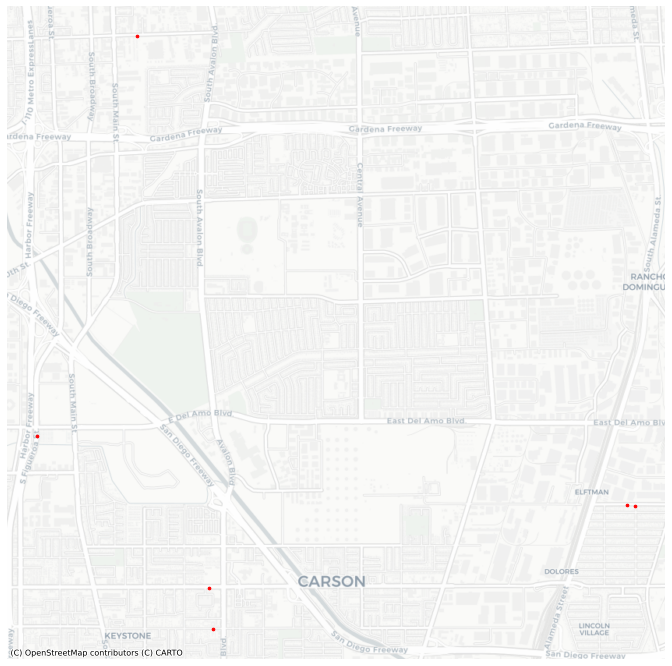

In [189]:
# map it!
fig,ax = plt.subplots(figsize=(12,12))

carson.plot(ax=ax,
             color='red',
             markersize=7)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [190]:
# get the bounding box coordinates for the Carson Closed MHPs data
minx, miny, maxx, maxy = carson.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13167341.877739018
-13160008.110867925
4005698.699315378
4012972.5156044518


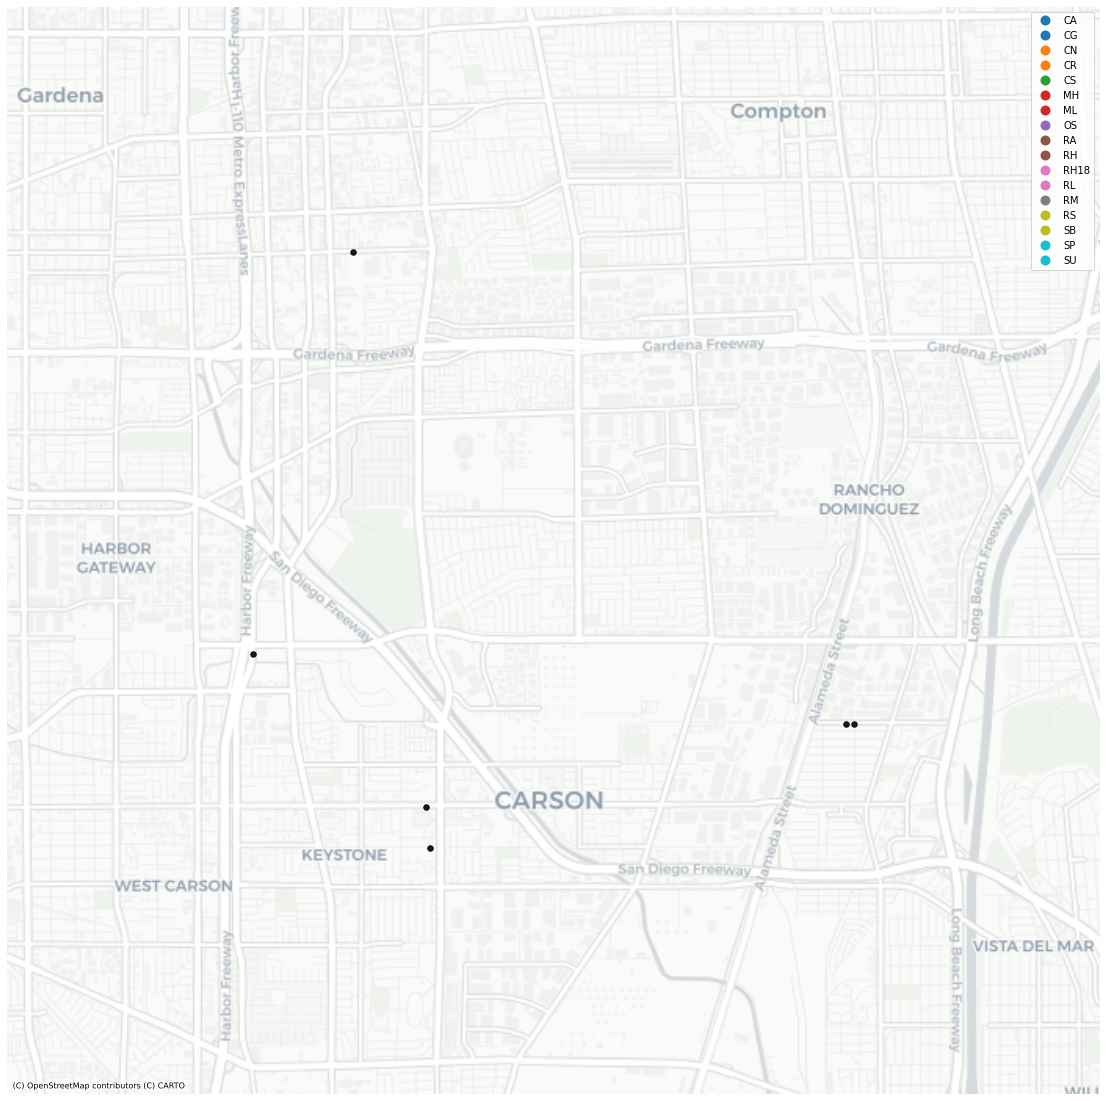

In [191]:
#set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(20, 20))

# zoning parcels
carsonzoning_web_mercator.plot(ax=ax,
                figsize=(20,20), 
                column='ZONECOMBO',
                legend=True)


#closed mobile home parks
carson.plot(ax=ax, # this also puts it in the same ax plot
            color='black',
            markersize=30,
            alpha=0.9)

# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx - 3000, maxx + 3000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 3000, maxy + 3000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)